In [1]:

import sys
import os

sys.path.insert(0, '..')

from process_bigraph import Composite
from biosimulator_processes import CORE
from biosimulator_processes.helpers import prepare_single_ode_process_document


omex_dir = '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')
simulators = ['amici', 'copasi', 'tellurium']

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator']


In [2]:
tellurium_instance = prepare_single_ode_process_document(
    process_id='tellurium_0', 
    simulator_address_name='tellurium-process', 
    sbml_model_fp=sbml_fp)

In [3]:
copasi_instance = prepare_single_ode_process_document(
    process_id='copasi_1', 
    simulator_address_name='copasi-process', 
    sbml_model_fp=sbml_fp)

In [4]:
copasi_instance

{'copasi_1': {'_type': 'process',
  'address': 'local:copasi-process',
  'config': {'model': {'model_source': '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml'}},
  'inputs': {'floating_species_concentrations': ['copasi_1_floating_species_concentrations_store'],
   'model_parameters': ['model_parameters_store'],
   'time': ['time_store'],
   'reactions': ['reactions_store']},
  'outputs': {'floating_species_concentrations': ['copasi_1_floating_species_concentrations_store'],
   'time': ['time_store']}},
 'emitter': {'_type': 'step',
  'address': 'local:ram-emitter',
  'config': {'emit': {'floating_species_concentrations': 'tree[float]',
    'time': 'float'}},
  'inputs': {'floating_species_concentrations': ['copasi_1_floating_species_concentrations_store'],
   'time': ['time_store']}}}

In [5]:
tellurium_instance

{'tellurium_0': {'_type': 'process',
  'address': 'local:tellurium-process',
  'config': {'model': {'model_source': '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml'}},
  'inputs': {'floating_species_concentrations': ['tellurium_0_floating_species_concentrations_store'],
   'model_parameters': ['model_parameters_store'],
   'time': ['time_store'],
   'reactions': ['reactions_store']},
  'outputs': {'floating_species_concentrations': ['tellurium_0_floating_species_concentrations_store'],
   'time': ['time_store']}},
 'emitter': {'_type': 'step',
  'address': 'local:ram-emitter',
  'config': {'emit': {'floating_species_concentrations': 'tree[float]',
    'time': 'float'}},
  'inputs': {'floating_species_concentrations': ['tellurium_0_floating_species_concentrations_store'],
   'time': ['time_store']}}}

In [6]:
doc = {**copasi_instance, **tellurium_instance}

In [7]:
doc['emitter']['inputs']['copasi_floating_species_concentrations'] = ['copasi_1_floating_species_concentrations_store']
doc['emitter']['config']['emit']['copasi_floating_species_concentrations'] = 'tree[float]'

In [8]:
doc

{'copasi_1': {'_type': 'process',
  'address': 'local:copasi-process',
  'config': {'model': {'model_source': '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml'}},
  'inputs': {'floating_species_concentrations': ['copasi_1_floating_species_concentrations_store'],
   'model_parameters': ['model_parameters_store'],
   'time': ['time_store'],
   'reactions': ['reactions_store']},
  'outputs': {'floating_species_concentrations': ['copasi_1_floating_species_concentrations_store'],
   'time': ['time_store']}},
 'emitter': {'_type': 'step',
  'address': 'local:ram-emitter',
  'config': {'emit': {'floating_species_concentrations': 'tree[float]',
    'time': 'float',
    'copasi_floating_species_concentrations': 'tree[float]'}},
  'inputs': {'floating_species_concentrations': ['tellurium_0_floating_species_concentrations_store'],
   'time': ['time_store'],
   'copasi_floating_species_concentrations': ['copasi_1_floating_species_concentrations_store']}},

In [9]:
composite = Composite(config={'state': doc}, core=CORE)

found a filepath


In [10]:
for n in range(10):
    composite.run(n)

/Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/demos/../biosimulator_processes/processes/copasi_process.py:328: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [15]:
composite1 = Composite(config={'state': doc}, core=CORE)
composite1.run(10)


found a filepath


{('emitter',): [{'floating_species_concentrations': {'PX': 0.0,
    'PY': 0.0,
    'PZ': 0.0,
    'X': 0.0,
    'Y': 20.0,
    'Z': 0.0},
   'time': 0.0,
   'copasi_floating_species_concentrations': {'LacI protein': 0.0,
    'TetR protein': 0.0,
    'cI protein': 0.0,
    'LacI mRNA': 0.0,
    'TetR mRNA': 20.0,
    'cI mRNA': 0.0}},
  {'floating_species_concentrations': {'PX': 81.44042642566572,
    'PY': 188.38202008535558,
    'PZ': 42.64136438835863,
    'X': 19.903425597345827,
    'Y': 50.61552585075981,
    'Z': 7.491014471958641},
   'time': 2.0,
   'copasi_floating_species_concentrations': {'LacI protein': 81.44046884923394,
    'TetR protein': 188.3821831030562,
    'cI protein': 42.64131125320374,
    'LacI mRNA': 19.90344166947679,
    'TetR mRNA': 50.61558010446934,
    'cI mRNA': 7.491001903157758}},
  {'floating_species_concentrations': {'PX': 300.01724369105887,
    'PY': 659.3718975212375,
    'PZ': 126.74353321448297,
    'X': 41.15678771794405,
    'Y': 88.3666566254

In [16]:
len(composite1.gather_results().values())

1

In [11]:
results = composite.gather_results()

In [12]:
results

{('emitter',): [{'floating_species_concentrations': {'PX': 0.0,
    'PY': 0.0,
    'PZ': 0.0,
    'X': 0.0,
    'Y': 20.0,
    'Z': 0.0},
   'time': 0.0,
   'copasi_floating_species_concentrations': {'LacI protein': 0.0,
    'TetR protein': 0.0,
    'cI protein': 0.0,
    'LacI mRNA': 0.0,
    'TetR mRNA': 20.0,
    'cI mRNA': 0.0}},
  {'floating_species_concentrations': {'PX': 81.44042642566572,
    'PY': 188.38202008535558,
    'PZ': 42.64136438835863,
    'X': 19.903425597345827,
    'Y': 50.61552585075981,
    'Z': 7.491014471958641},
   'time': 2.0,
   'copasi_floating_species_concentrations': {'LacI protein': 81.44046884923394,
    'TetR protein': 188.3821831030562,
    'cI protein': 42.64131125320374,
    'LacI mRNA': 19.90344166947679,
    'TetR mRNA': 50.61558010446934,
    'cI mRNA': 7.491001903157758}},
  {'floating_species_concentrations': {'PX': 300.01724369105887,
    'PY': 659.3718975212375,
    'PZ': 126.74353321448297,
    'X': 41.15678771794405,
    'Y': 88.3666566254

In [13]:
from process_bigraph.experiments.parameter_scan import RunProcess

In [14]:
tellurium_step.update({})

NameError: name 'tellurium_step' is not defined

In [2]:
import tellurium as te 

model = """
model FitzHugh_Nagumo_ReactionNetwork
  // Compartments and Species
  compartment cell = 1;
  species V in cell, W in cell;

  // Parameters
  const I = 0.5;  // External input current
  const a = 0.7;  // Parameter a
  const b = 0.8;  // Parameter b
  const tau = 12.5;  // Time scale parameter

  // Initial Conditions
  V = -1.0;  // Initial membrane potential
  W = 1.0;   // Initial recovery variable

  // Reactions
  J1: -> V; (V - (V^3 / 3) - W + I)
  J2: -> W; (V + a - b * W) / tau

end
"""

model = te.loada(model)

In [ ]:
import tellurium as te 


izhikevich_model = """
model izhikevich_simple_model 
    compartment cell = 1;
    species V in cell, W in cell;
    
    const a

"""

In [5]:
m = """
model FitzHugh_Nagumo_Bifurcation
  // Compartments and Species
  compartment cell = 1;
  species V in cell, W in cell;

  // Parameters
  const a = 0.7;  // Parameter a
  const b = 0.8;  // Parameter b
  const tau = 12.5;  // Time scale parameter
  I = 0.5;  // External input current

  // Initial Conditions
  V = -1.0;  // Initial membrane potential
  W = 1.0;   // Initial recovery variable

  // Reactions
  J1: -> V; (V - (V^3 / 3) - W + I)
  J2: -> W; (V + a - b * W) / tau

end
"""


m = te.loada(m)

In [22]:
p = '/Users/alex/Desktop/uchc_work/biosimulators-2.0/biosimulator-processes/test_suite/examples/sbml-core/BIOMD0000000020_url.xml'

In [2]:
model

<roadrunner.RoadRunner() { this = 0x600000958960 }>

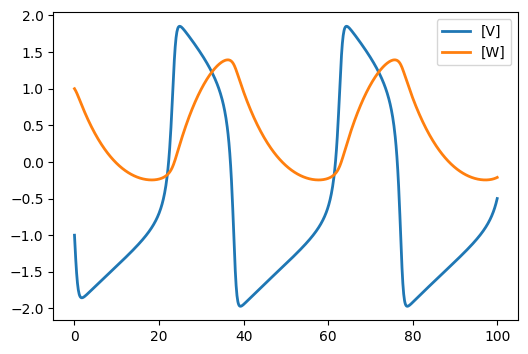

In [6]:
m.simulate(0, 100, 1000)
m.plot()

In [3]:
results = model.simulate(0, 10, 100)

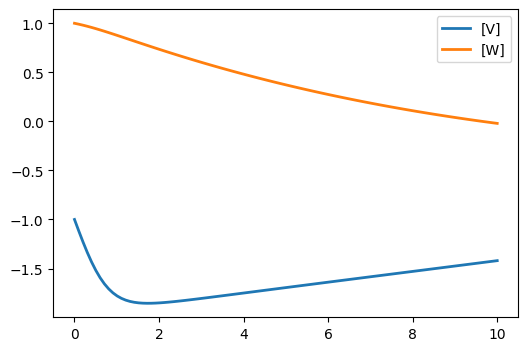

In [4]:
model.plot()